<a href="https://colab.research.google.com/github/vsangireddy27/MachineLearningProjects/blob/main/ML_FPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
path = '/content/FPL_DATA.csv'
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np



In [9]:
df = pd.read_csv(path)
df.columns = [column.replace('\n', '') for column in df.columns]
df.columns


Index(['Player', 'Team', 'Position', 'Cost', 'Status', 'Minutes', 'Pts.',
       'Bonus', 'Pts./game', 'Ownership %', 'PGP '],
      dtype='object')

In [10]:
label_encoder = LabelEncoder()
df['Team'] = label_encoder.fit_transform(df['Team'])
df['Position'] = label_encoder.fit_transform(df['Position'])
df['Status'] = label_encoder.fit_transform(df['Status'])
df.head()

,Player,Team,Position,Cost,Status,Minutes,Pts.,Bonus,Pts./game,Ownership %,PGP
0,A.Becker,11,2,5.5,0,2520,107,9,3.8,11.0,0.69
1,A.Doucoure,7,3,5.5,0,2632,116,7,3.6,0.6,0.65
2,A.Fatawu,10,3,5.5,0,0,0,0,0.0,0.5,0.00
3,A.Murphy,14,0,4.0,0,11,2,0,1.0,0.7,0.25
4,A.Phillips,17,0,4.0,0,0,0,0,0.0,0.5,0.00


In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       590 non-null    object 
 1   Team         590 non-null    int64  
 2   Position     590 non-null    int64  
 3   Cost         590 non-null    float64
 4   Status       590 non-null    int64  
 5   Minutes      590 non-null    int64  
 6   Pts.         590 non-null    int64  
 7   Bonus        590 non-null    int64  
 8   Pts./game    590 non-null    float64
 9   Ownership %  590 non-null    float64
 10  PGP          590 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 50.8+ KB


,Player,Team,Position,Cost,Status,Minutes,Pts.,Bonus,Pts./game,Ownership %,PGP
0,A.Becker,11,2,5.5,0,2520,107,9,3.8,11.0,0.69
1,A.Doucoure,7,3,5.5,0,2632,116,7,3.6,0.6,0.65
2,A.Fatawu,10,3,5.5,0,0,0,0,0.0,0.5,0.00
3,A.Murphy,14,0,4.0,0,11,2,0,1.0,0.7,0.25
4,A.Phillips,17,0,4.0,0,0,0,0,0.0,0.5,0.00


In [12]:
df = df.drop('Player', axis=1)
df.head()

,Team,Position,Cost,Status,Minutes,Pts.,Bonus,Pts./game,Ownership %,PGP
0,11,2,5.5,0,2520,107,9,3.8,11.0,0.69
1,7,3,5.5,0,2632,116,7,3.6,0.6,0.65
2,10,3,5.5,0,0,0,0,0.0,0.5,0.00
3,14,0,4.0,0,11,2,0,1.0,0.7,0.25
4,17,0,4.0,0,0,0,0,0.0,0.5,0.00


<Axes: >

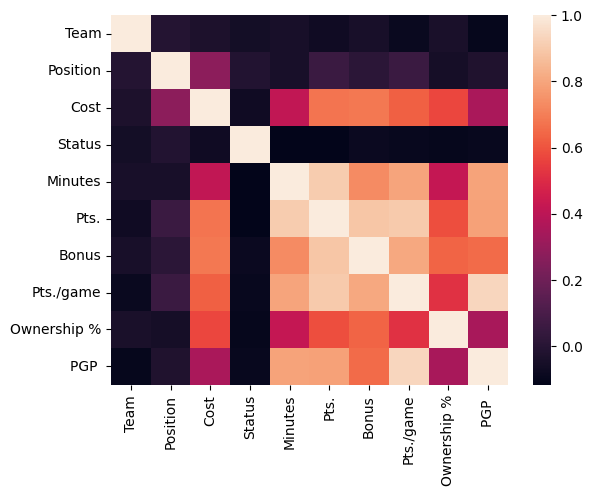

In [13]:
sns.heatmap(df.corr())

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

bins = [-float("inf"), 25, 50, 75, 100, float("inf")]
labels = [1, 2, 3, 4, 5]
df['Pts.'] = pd.cut(df['Pts.'], bins=bins, labels=labels)
df['Pts.'].value_counts()


,count
Pts.,
1,282
5,97
2,86
3,66
4,59


In [15]:
Y = df['Pts.']
X = df.drop(['Pts.'], axis=1)
X
Y

,Pts.
0,5
1,5
2,1
3,1
4,1
...,...
585,1
586,4
587,3
588,1


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
lrm = LogisticRegression(max_iter = 3000, random_state = 101)
lrm.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000, random_state=101)

In [18]:
pred = lrm.predict(X_test)

In [19]:
accuracy_score(Y_test, pred)


0.8050847457627118

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pred_rf = rf.fit(X_train, Y_train).predict(X_test)

In [21]:
accuracy_score(Y_test, pred_rf)


0.8559322033898306